# Data Exploration

In this notebook we will be exploring both of our datasets:

 - **bidders** dataset, which is located in train.csv.
 - **bids** dataset, which is located in bids.csv.
 
Let's start with the shortest one: **Bidders**

## Bidders exploratory analysis

### Loading the dataset

Let's start by loading the dataset in a Pandas' dataframse.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [1]:
import pandas as pd

# Change accordingly.
bidders_file_path = "../data/train.csv"

bidders_dataframe = pd.read_csv(bidders_file_path)

sample_size = 10

# Let's start by taking a small sample
bidders_dataframe.sample(n=sample_size)

,bidder_id,payment_account,address,outcome
1426,d9576f0ba8c7479eb2b26f0d15c4abfayk5ex,a3d2de7675556553a5f08e4c88d2c228s890p,a3d2de7675556553a5f08e4c88d2c228pdpzb,0.0
156,ca76df527977e5168e1b3352cfab2ed9htipb,d75b72c487117542fcbb0ce7a24371911a5de,af1f7f6037629540231bf20ca424d356wrk9v,0.0
987,cb557e4675bf4f36f93ef5599adff545nz370,491396631d5eb6a31b92dcf78c034ac36v2vx,02b646e40106435e0d293cebd157c5931ebq0,0.0
1005,37702159c6cd2c1a21cf66600e96cdc6rdbff,822810bfcf33e69e0fdcada7c2689a383gae4,0a8f0d1fcc4255db0d4d36873f0b1d259abho,0.0
689,af5d33f9724b0e8c1f875406c0556d1e6eotm,852d7ae9bd6cf7f4a5d8a3321998dd88bjrov,aa93ed2eb0134d1bd800f56b9c07a843jqspy,0.0
1466,67ab503313f60aaba89f64e2ce3b459fvyahu,00016d5c35b1090c2516138babe21a50jcr1b,c89b2a7a0f7d3ba109dd2cbc14558c88bk75j,0.0
186,e613acb1029ecafd9792c9f75d468e4bmm9zn,a3d2de7675556553a5f08e4c88d2c228eovaw,a3d2de7675556553a5f08e4c88d2c228rj4u3,0.0
1422,e134f2bb79d1a810aada6a24760c8910mh5na,a3d2de7675556553a5f08e4c88d2c2287j1ho,e350bda3ceb6067cad400ae931c3527aodbiw,0.0
634,7c965df16147f68263573764dd257a7bxqmpt,a3d2de7675556553a5f08e4c88d2c228qhaxv,d1e7fd494d76ca843bdb0350ad14cbf0956va,0.0
1734,96dccfc370343f6871dc478d5b2fc3ffx95d3,a3d2de7675556553a5f08e4c88d2c228333u1,794abfcfc9a51569c6415a61a319b352bvmem,0.0


As we can see above, all the relevant fields (besides outcome) are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [2]:
# Totals
total_bidders = len(bidders_dataframe)
number_of_human_bidders = len(bidders_dataframe[bidders_dataframe['outcome'] == 0.0])
number_of_bot_bidders = total_bidders - number_of_human_bidders

# Proportions
human_bidders_proportion = number_of_human_bidders / total_bidders
bot_bidders_proportion = number_of_bot_bidders / total_bidders

# Statistics
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of human bidders: {:,}".format(number_of_human_bidders))
print("Number of bot bidders: {:,}".format(number_of_bot_bidders))
print("Proportion of human bidders: {:.2%}".format(human_bidders_proportion))
print("Proportion of bot bidders: {:.2%}".format(bot_bidders_proportion))

Number of total bidders: 2,013
Number of human bidders: 1,910
Number of bot bidders: 103
Proportion of human bidders: 94.88%
Proportion of bot bidders: 5.12%


The first thing we notice is that our dataset is highly unbalanced, where 1910 out of 2013 records represent human bidders (94.88%), whereas only a small percentage (5.12%) of the bidders were flagged as bots (103 out of 2013).

For a better understanding of this situation, let's visualize it:

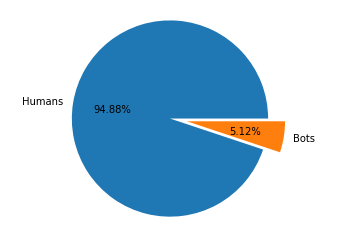

In [3]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()

# Pie chart parameters
pie_data = [number_of_human_bidders, number_of_bot_bidders]
pie_labels = ('Humans', 'Bots')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', shadow=False, explode=pie_labels_explode_coefficients)
plt.axis('equal')
plt.show()

___

## Bids exploratory analysis

Let's now proceed to explore the **bids** dataset.

**NOTE**: We expect all the relevant files to be located in `../data`.

In [4]:
# Change accordingly.
bids_file_path = "../data/bids.csv"

bids_dataframe = pd.read_csv(bids_file_path)

sample_size = 10

# Let's start by taking a small sample
#bids_dataframe.sample(n=sample_size)
bids_dataframe.head(n=sample_size)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


As we can see above, fields such as time, bidder_id, auction, device and url are obfuscated. 

This doesn't mean they won't be useful for our model, but surely make things a bit harder to interpret for us.

### Descriptive statistics

In [5]:
# Totals
total_bids = len(bids_dataframe)
total_auctions = len(set(bids_dataframe['auction']))
total_bidders_in_bids_dataframe = len(set(bids_dataframe['bidder_id']))
total_devices = len(set(bids_dataframe['device']))
total_countries = len(set(bids_dataframe['country']))
total_ips = len(set(bids_dataframe['ip']))
total_urls = len(set(bids_dataframe['url']))
total_merchandise_categories = len(set(bids_dataframe['merchandise']))

print("Number of bids: {:,}".format(total_bids))
print("Number of auctions: {:,}".format(total_auctions))
print("Number of total bidders in bids dataset: {:,}".format(total_bidders_in_bids_dataframe))
print("Number of devices: {:,}".format(total_devices))
print("Number of countries: {:,}".format(total_countries))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise_categories))

Number of bids: 7,656,334
Number of auctions: 15,051
Number of total bidders in bids dataset: 6,614
Number of devices: 7,351
Number of countries: 200
Number of IPs: 2,303,991
Number of URLs: 1,786,351
Number of merchandise categories: 10


In [6]:
data_per_user = bids_dataframe.groupby(['bidder_id'])

auctions_per_user = data_per_user['auction'].nunique()
mean_auctions_per_user = auctions_per_user.mean()
median_auctions_per_user = auctions_per_user.median()
mode_auctions_per_user = auctions_per_user.mode()

print("Average number of auctions per user: {}".format(mean_auctions_per_user))
print("Median of auctions per user: {}".format(median_auctions_per_user))
print("Mode of auctions per user: {}".format(mode_auctions_per_user[0]))
print("User with more auctions: {}".format(auctions_per_user.max()))
print("User with less auctions: {}".format(auctions_per_user.min()))
print("-----------------------------")

bids_per_user = data_per_user['bid_id'].count()
mean_bids_per_user = bids_per_user.mean()
median_bids_per_user = bids_per_user.median()
mode_bids_per_user = bids_per_user.mode()

print("Average number of bids per user: {}".format(mean_bids_per_user))
print("Median of bids per user: {}".format(median_bids_per_user))
print("Mode of bids per user: {}".format(mode_bids_per_user[0]))
print("User with more bids: {}".format(bids_per_user.max()))
print("User with less bids: {}".format(bids_per_user.min()))
print("-----------------------------")

countries_per_user = data_per_user['country'].nunique()
mean_countries_per_user = countries_per_user.mean()
median_countries_per_user = countries_per_user.median()
mode_countries_per_user = countries_per_user.mode()

print("Average number of countries per user: {}".format(mean_countries_per_user))
print("Median of countries per user: {}".format(median_countries_per_user))
print("Mode of countries per user: {}".format(mode_countries_per_user[0]))
print("User with more countries: {}".format(countries_per_user.max()))
print("User with less countries: {}".format(countries_per_user.min()))
print("-----------------------------")

ips_per_user = data_per_user['ip'].nunique()
mean_ips_per_user = ips_per_user.mean()
median_ips_per_user = ips_per_user.median()
mode_ips_per_user = ips_per_user.mode()

print("Average number of IPs per user: {}".format(mean_ips_per_user))
print("Median of IPs per user: {}".format(median_ips_per_user))
print("Mode of IPs per user: {}".format(mode_ips_per_user[0]))
print("User with more IPs: {}".format(ips_per_user.max()))
print("User with less IPs: {}".format(ips_per_user.min()))
print("-----------------------------")

bids_per_auction_ratio_per_user = bids_per_user / auctions_per_user
average_response_time_per_user = data_per_user['time'].apply(lambda x: x.diff().mean()).fillna(0)

Average number of auctions per user: 57.807831871787116
Median of auctions per user: 10.0
Mode of auctions per user: 1
User with more auctions: 1726
User with less auctions: 1
-----------------------------
Average number of bids per user: 1157.595101300272
Median of bids per user: 18.0
Mode of bids per user: 1
User with more bids: 515033
User with less bids: 1
-----------------------------
Average number of countries per user: 12.72422134865437
Median of countries per user: 3.0
Mode of countries per user: 1
User with more countries: 178
User with less countries: 0
-----------------------------
Average number of IPs per user: 544.0963108557605
Median of IPs per user: 12.0
Mode of IPs per user: 1
User with more IPs: 111918
User with less IPs: 1
-----------------------------


# Exploratory Visualization

Given our aim is to determine which information or bidding behavior is characteristic of bot users, we are going to focus on visualizing only data related to bidders.

Let's start by seeing again the distribution between bidders labeled as bots and as humans:

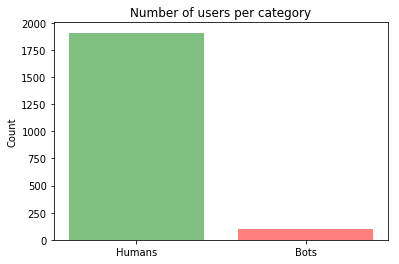

In [7]:
import numpy as np
y_pos = np.arange(len(pie_labels))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, pie_data, align='center', alpha=0.5, color=['green', 'red'])
plt.xticks(y_pos, pie_labels)
plt.ylabel('Count')
plt.title('Number of users per category')

plt.show()

Let's now visualize auctions per user:

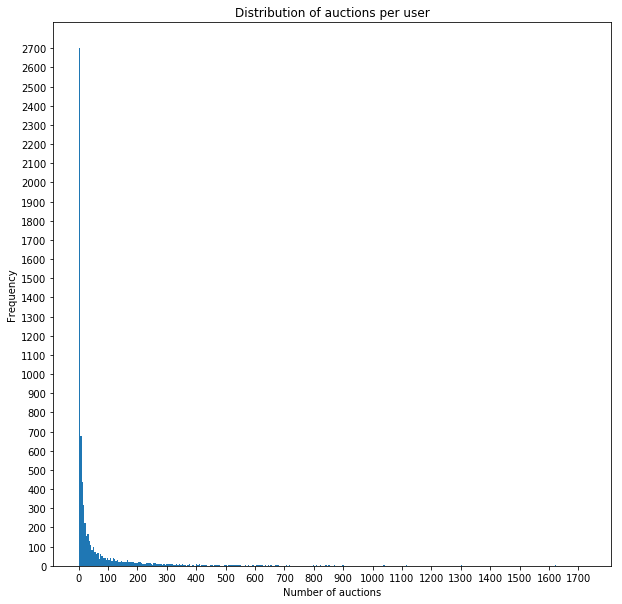

In [53]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(auctions_per_user, bins='auto')
plt.yticks(range(0, 2800, 100))
plt.xticks(range(0, 1800, 100))
plt.title("Distribution of auctions per user")
plt.xlabel("Number of auctions")
plt.ylabel("Frequency")
plt.show()

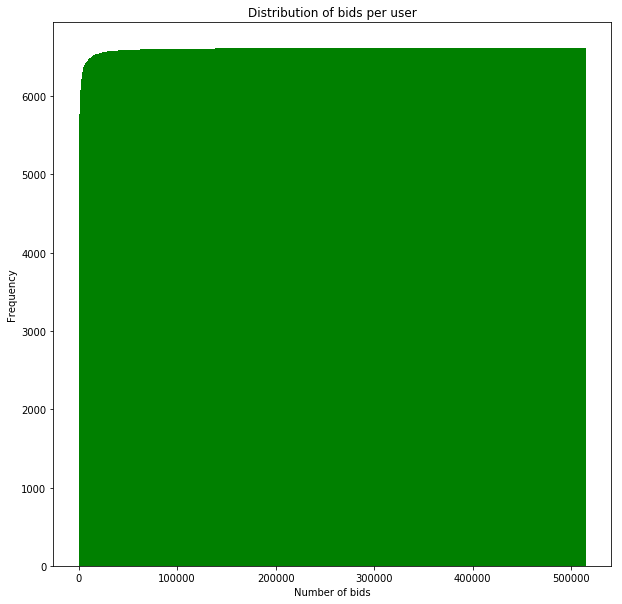

In [59]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(bids_per_user, bins='auto', cumulative=True, color='green')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of bids per user")
plt.xlabel("Number of bids")
plt.ylabel("Frequency")
plt.show()

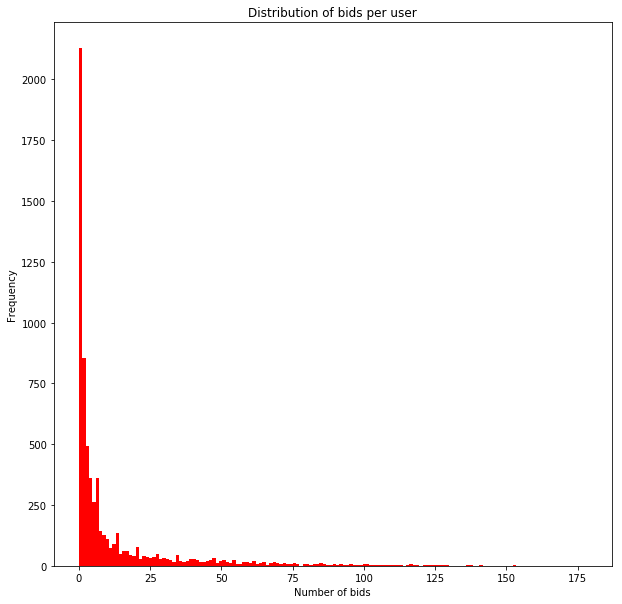

In [58]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
plt.hist(countries_per_user, bins='auto', color='red')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of countries per user")
plt.xlabel("Number of countries")
plt.ylabel("Frequency")
plt.show()

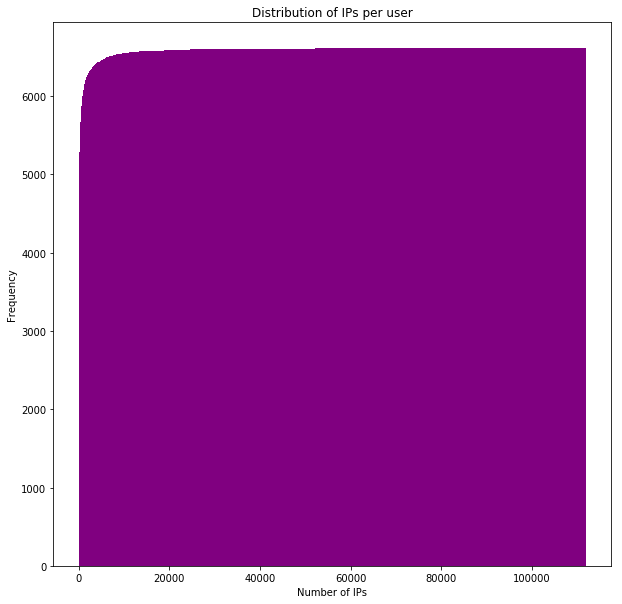

In [73]:
plt.figure(figsize=(10,10))
# Explore log=True, cumulative=True
#plt.plot(sorted(ips_per_user.values, reverse=True))
plt.hist(ips_per_user, bins='auto', color='purple', cumulative=True)
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of IPs per user")
plt.xlabel("Number of IPs")
plt.ylabel("Frequency")
plt.show()

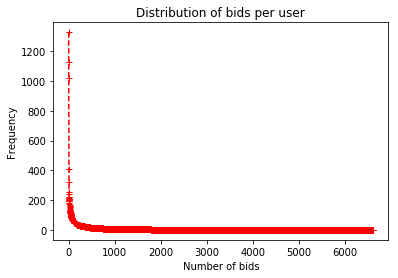

In [81]:
# Explore log=True, cumulative=True
plt.plot(sorted(bids_per_auction_ratio_per_user.values, reverse=True), 'r+--')
#plt.yticks(range(0, 2800, 100))
#plt.xticks(range(0, 1800, 100))
plt.title("Distribution of bids per user")
plt.xlabel("Number of bids")
plt.ylabel("Frequency")
plt.show()